In [ ]:
### wl
wl = np.genfromtxt("interpolated_wl.csv",skip_header=1)[::-1]

ID_and_flux = pd.read_csv("fluxes_for_HIRES.csv")
ivar = pd.read_csv("ivar_for_HIRES.csv")


#tr_ID
ID = ID_and_flux.columns.to_numpy()  
# #tr_flux
tr_flux = ID_and_flux.transpose().to_numpy() 
tr_ID = ID_and_flux.columns.to_numpy()
#tr_ivar
tr_ivar = ivar.to_numpy().T
#Telluric 
telluric_q = True
# tr_label
d = pd.read_csv("../spocData/df_all.csv", index_col=2)
for c in ["Unnamed: 0","Unnamed: 0.1",'CH','NH','OH','NaH','MgH','AlH','SiH',
          'CaH','TiH','VH','CrH','MnH','NiH','YH','DIR']:
    d.pop(c)
for i in range(22,40):
    d.pop("Unnamed: {}".format(i))

tr_label = d.to_numpy()

removeList = []
for i in d.index:
    test = i.replace(" ","")
    if test not in tr_ID:
        removeList.append(i)
for name in removeList:
    d = d.drop(name)  
    
index_d = d.index
index_d = np.array([i.replace(" ","") for i in index_d])
length_d = len(index_d)
restruc = []
array_d = d.to_numpy()
checking_index = 0
for i in range(len(tr_ID)):
    temp_ID = tr_ID[i-checking_index]
    loc = np.where(index_d == temp_ID)
    
    temp_list = []
    for l in array_d[loc]:
        for j in l:
            temp_list.append(float(j))
    if len(temp_list) == 0:
        tr_ID = np.delete(tr_ID,i-checking_index)
        tr_flux = np.delete(tr_flux,i-checking_index,0)
        tr_ivar = np.delete(tr_ivar,i-checking_index,0)
        checking_index+=1 
    else:
        restruc.append(temp_list)
tr_label = np.array(restruc)

if telluric_q: 
    t = []
    telluric = np.genfromtxt('../spocData/telluric_mask.txt')
    for i in range(len(tr_flux)):
        t.append(tr_flux[i] * telluric)
    t = np.array(t)
    tr_flux = t 

In [20]:
# Using the last 5% for testing 
RS = 32 #Random Seed # 
testing_percentage = 0.20
np.random.seed(RS)
train_ID, test_ID, tr_flux, test_flux = train_test_split(tr_ID, tr_flux, test_size = testing_percentage)
np.random.seed(RS)
tr_ID2, _, tr_ivar, test_ivar = train_test_split(tr_ID, tr_ivar, test_size = testing_percentage)
np.random.seed(RS)
tr_ID, _, tr_label, true_test_labels = train_test_split(tr_ID, tr_label, test_size = testing_percentage)

In [32]:
new_label = train_labels

In [40]:
t = 0
for i in true_test_labels:
    if not (i == test_labels).any():
        t +=1
print(t)

0


In [34]:
len(new_label)

586

In [35]:
len(tr_label)

586

In [1]:
#Imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import TheCannon

from sklearn.model_selection import train_test_split
from TheCannon import apogee
from TheCannon import model
from TheCannon import dataset

In [2]:
#Things to change
random_seed_number = 32  #For np.random.seed
#If you don't want to use a telluric mask, simply make 
# the path == False 
telluric_mask_path = '../spocData/telluric_mask.txt' 
fluxes_path = 'fluxes_for_HIRES.csv'
ivars_path = 'ivar_for_HIRES.csv'
test_percent = 0.20 #testing % of data The Cannon will train on 
labels = ['T_{eff}', 'log g','vsini','[Fe/H]'] #Labels you wanna train on 

In [3]:
#Loading Data 
wl = pd.read_csv("interpolated_wl.csv").to_numpy().T[0]
#-----
ID_and_flux = pd.read_csv(fluxes_path)
hires_ivar = pd.read_csv(ivars_path).to_numpy().T
hires_flux = ID_and_flux.transpose().to_numpy() 
hires_ID = ID_and_flux.columns.to_numpy()
#-----Remove any unwanted Labels from SPOC data 
spoc = pd.read_csv("../spocData/df_all.csv", index_col=2)
for c in ["Unnamed: 0","Unnamed: 0.1",'CH','NH','OH','NaH','MgH','AlH','SiH',
          'CaH','TiH','VH','CrH','MnH','NiH','YH','DIR']:
    spoc.pop(c)
for i in range(22,40):
    spoc.pop("Unnamed: {}".format(i))
spoc_star_IDs = np.array([ID.replace(" ","") for ID in spoc.index])
spoc_star_label_values = spoc.to_numpy()
#-----

In [4]:
wl = np.genfromtxt("interpolated_wl.csv",skip_header=1)[::-1]

ID_and_flux = pd.read_csv("fluxes_for_HIRES.csv")
ivar = pd.read_csv("ivar_for_HIRES.csv")
#tr_ID
ID = ID_and_flux.columns.to_numpy()  
# #tr_flux
tr_flux = ID_and_flux.transpose().to_numpy() 
tr_ID = ID_and_flux.columns.to_numpy()
#tr_ivar
tr_ivar = ivar.to_numpy().T
#-----

In [6]:
# tr_label
d = pd.read_csv("../spocData/df_all.csv", index_col=2)
for c in ["Unnamed: 0","Unnamed: 0.1",'CH','NH','OH','NaH','MgH','AlH','SiH',
          'CaH','TiH','VH','CrH','MnH','NiH','YH','DIR']:
    d.pop(c)
for i in range(22,40):
    d.pop("Unnamed: {}".format(i))

tr_label = d.to_numpy()

In [8]:
index_d = d.index
index_d = np.array([i.replace(" ","") for i in index_d])
length_d = len(index_d)
restruc = []
array_d = d.to_numpy()
checking_index = 0
for i in range(len(tr_ID)):
    temp_ID = tr_ID[i-checking_index]
    loc = np.where(index_d == temp_ID)
    
    temp_list = []
    for l in array_d[loc]:
        for j in l:
            temp_list.append(float(j))
    if len(temp_list) == 0:
        tr_ID = np.delete(tr_ID,i-checking_index)
        tr_flux = np.delete(tr_flux,i-checking_index,0)
        tr_ivar = np.delete(tr_ivar,i-checking_index,0)
        checking_index+=1 
    else:
        restruc.append(temp_list)
tr_label = np.array(restruc)

In [9]:
#Removes stars that aren't in both the SPOC & HIRES data
labels,IDs,fluxes,ivars = [],[],[],[]
for index_hires in range(len(hires_ID)):
    id_hires = hires_ID[index_hires]
    index_spoc = np.where(id_hires == spoc_star_IDs)[0]
    if index_spoc.size > 0: #If the HIRES ID is in the spoc IDs 
        #Comes from HIRES
        fluxes.append(hires_flux[index_hires])
        IDs.append(hires_ID[index_hires])
        ivars.append(hires_ivar[index_hires])
        #Comes from SPOC 
        labels.append(spoc_star_label_values[index_spoc][0])
labels,IDs = np.array(labels),np.array(IDs)
fluxes,ivars = np.array(fluxes),np.array(ivars)

In [10]:
#Telluric Mask
if telluric_mask_path:
    telluric_mask = np.genfromtxt(telluric_mask_path)
    fluxes *= telluric_mask   

In [11]:
#Spliting the Data
np.random.seed(random_seed_number)
train_IDs,test_IDs,train_fluxes,test_fluxes = train_test_split(IDs, fluxes, test_size = test_percent)
np.random.seed(random_seed_number)
_,_,train_ivars,test_ivars = train_test_split(IDs, ivars, test_size = test_percent)
np.random.seed(random_seed_number)
_,_,train_labels,test_labels = train_test_split(IDs, labels, test_size = test_percent)

In [12]:
print("wl ",wl.shape, type(wl))
print("ID ",train_IDs.shape,type(train_IDs))
print("flux ",train_fluxes.shape,type(train_fluxes))
print("ivar ",train_ivars.shape,type(train_ivars))
print("label ",train_labels.shape,type(train_labels))

wl  (64336,) <class 'numpy.ndarray'>
ID  (586,) <class 'numpy.ndarray'>
flux  (586, 64336) <class 'numpy.ndarray'>
ivar  (586, 64336) <class 'numpy.ndarray'>
label  (586, 4) <class 'numpy.ndarray'>


In [13]:
print("wl ",wl.shape, type(wl))
print("ID ",test_IDs.shape,type(test_IDs))
print("flux ",test_fluxes.shape,type(test_fluxes))
print("ivar ",test_ivars.shape,type(test_ivars))
print("label ",test_labels.shape,type(test_labels))

wl  (64336,) <class 'numpy.ndarray'>
ID  (147,) <class 'numpy.ndarray'>
flux  (147, 64336) <class 'numpy.ndarray'>
ivar  (147, 64336) <class 'numpy.ndarray'>
label  (147, 4) <class 'numpy.ndarray'>


Loading dataset
This may take a while...
Diagnostic for SNRs of reference and survey objects
Done training model. 


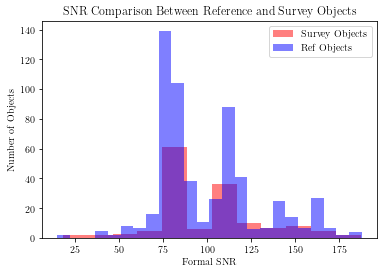

In [14]:
#The Cannon Dataset class
ds = dataset.Dataset(wl, 
                     train_IDs, train_fluxes, train_ivars, train_labels,
                     test_IDs, test_fluxes, test_ivars)
#Setting the labels 
ds.set_label_names(labels)
#Plot SNR 
fig = ds.diagnostics_SNR() 
#Setting the range/s the of wavelengths The Cannon will use for training
ds.ranges= [[min(wl),max(wl)]]
#Begin training 
md = model.CannonModel(2, useErrors=False)
md.fit(ds)

Diagnostic plot: leading coeffs and scatters across wavelength.


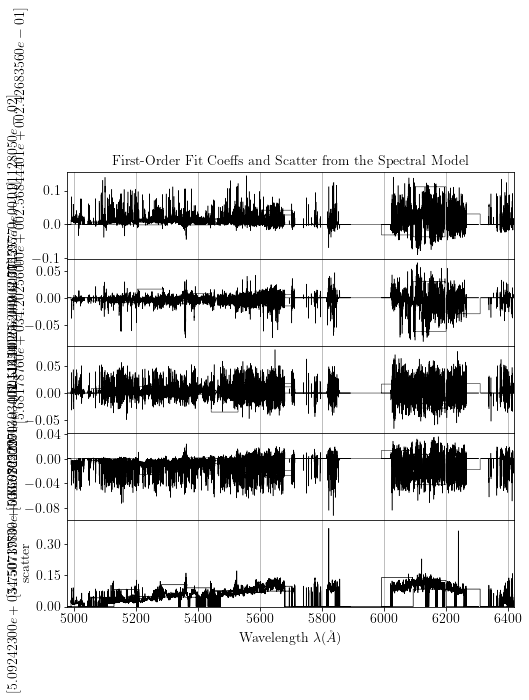

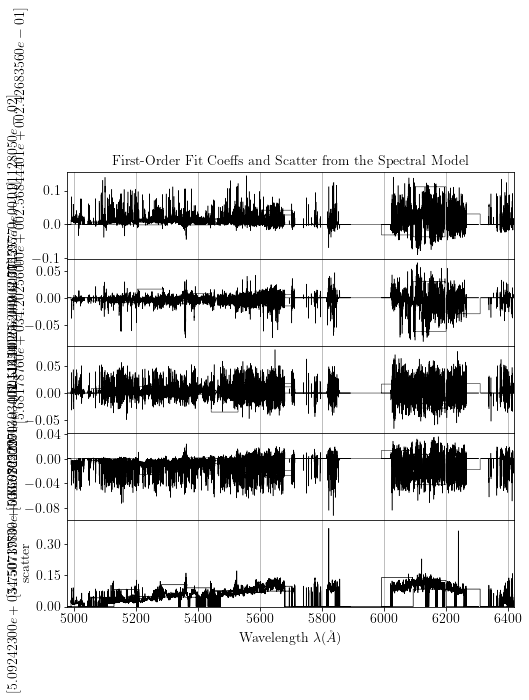

In [15]:
md.diagnostics_leading_coeffs(ds)

In [16]:
md.diagnostics_plot_chisq(ds)

Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png


In [17]:
label_errs = md.infer_labels(ds)

Inferring Labels


ValueError: shapes (64336,14) and (269744,) not aligned: 14 (dim 1) != 269744 (dim 0)

In [ ]:
ds.diagnostics_test_step_flagstars()
ds.diagnostics_survey_labels()

In [ ]:
def MakeTrueVsPredictedPlots(true_label_vals,predicted_label_vals,col_num,labels):
    '''
    
    '''
    x = true_label_vals[:,col_num]
    y = predicted_label_vals[:,col_num]
    res = stats.linregress(x, y)
    plt.plot(x, y, 'o', label='true')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='Best Fit')
    plt.legend()
    plt.title(f"RS={RS},Test\%={testing_percentage}")
    plt.xlabel(f'true ${labels[col_num]}$')
    plt.ylabel(f'predicted ${labels[col_num]}$')
    plt.show()
#Plotting regression line for all labels 
for i in range(len(labels)):
    MakeTrueVsPredictedPlots(true_test_labels,Cannon_test_labels,i,labels)

In [ ]:
#Testing Below